# Below are the steps followed for this exercise:

1) Read, understand, visualize and peform EDA on the data

2) Prepare the data for model training (train-test split, rescaling)

3) Train the model

4) Residual analysis

5) Prediction and evaluation of the test set

### Step 1: Read and Understand the data

1. Import the required libraries
2. Understand the structure of the data

In [189]:
# Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [191]:
# Import Libraries and required functions
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

In [192]:
#Read the dataset
df = pd.read_csv("day.csv")

In [193]:
#Check the data
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [194]:
#Check the shape of the dataset 
df.shape

(730, 16)

In [195]:
#Check the description of the dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [196]:
#Check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [197]:
#Check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

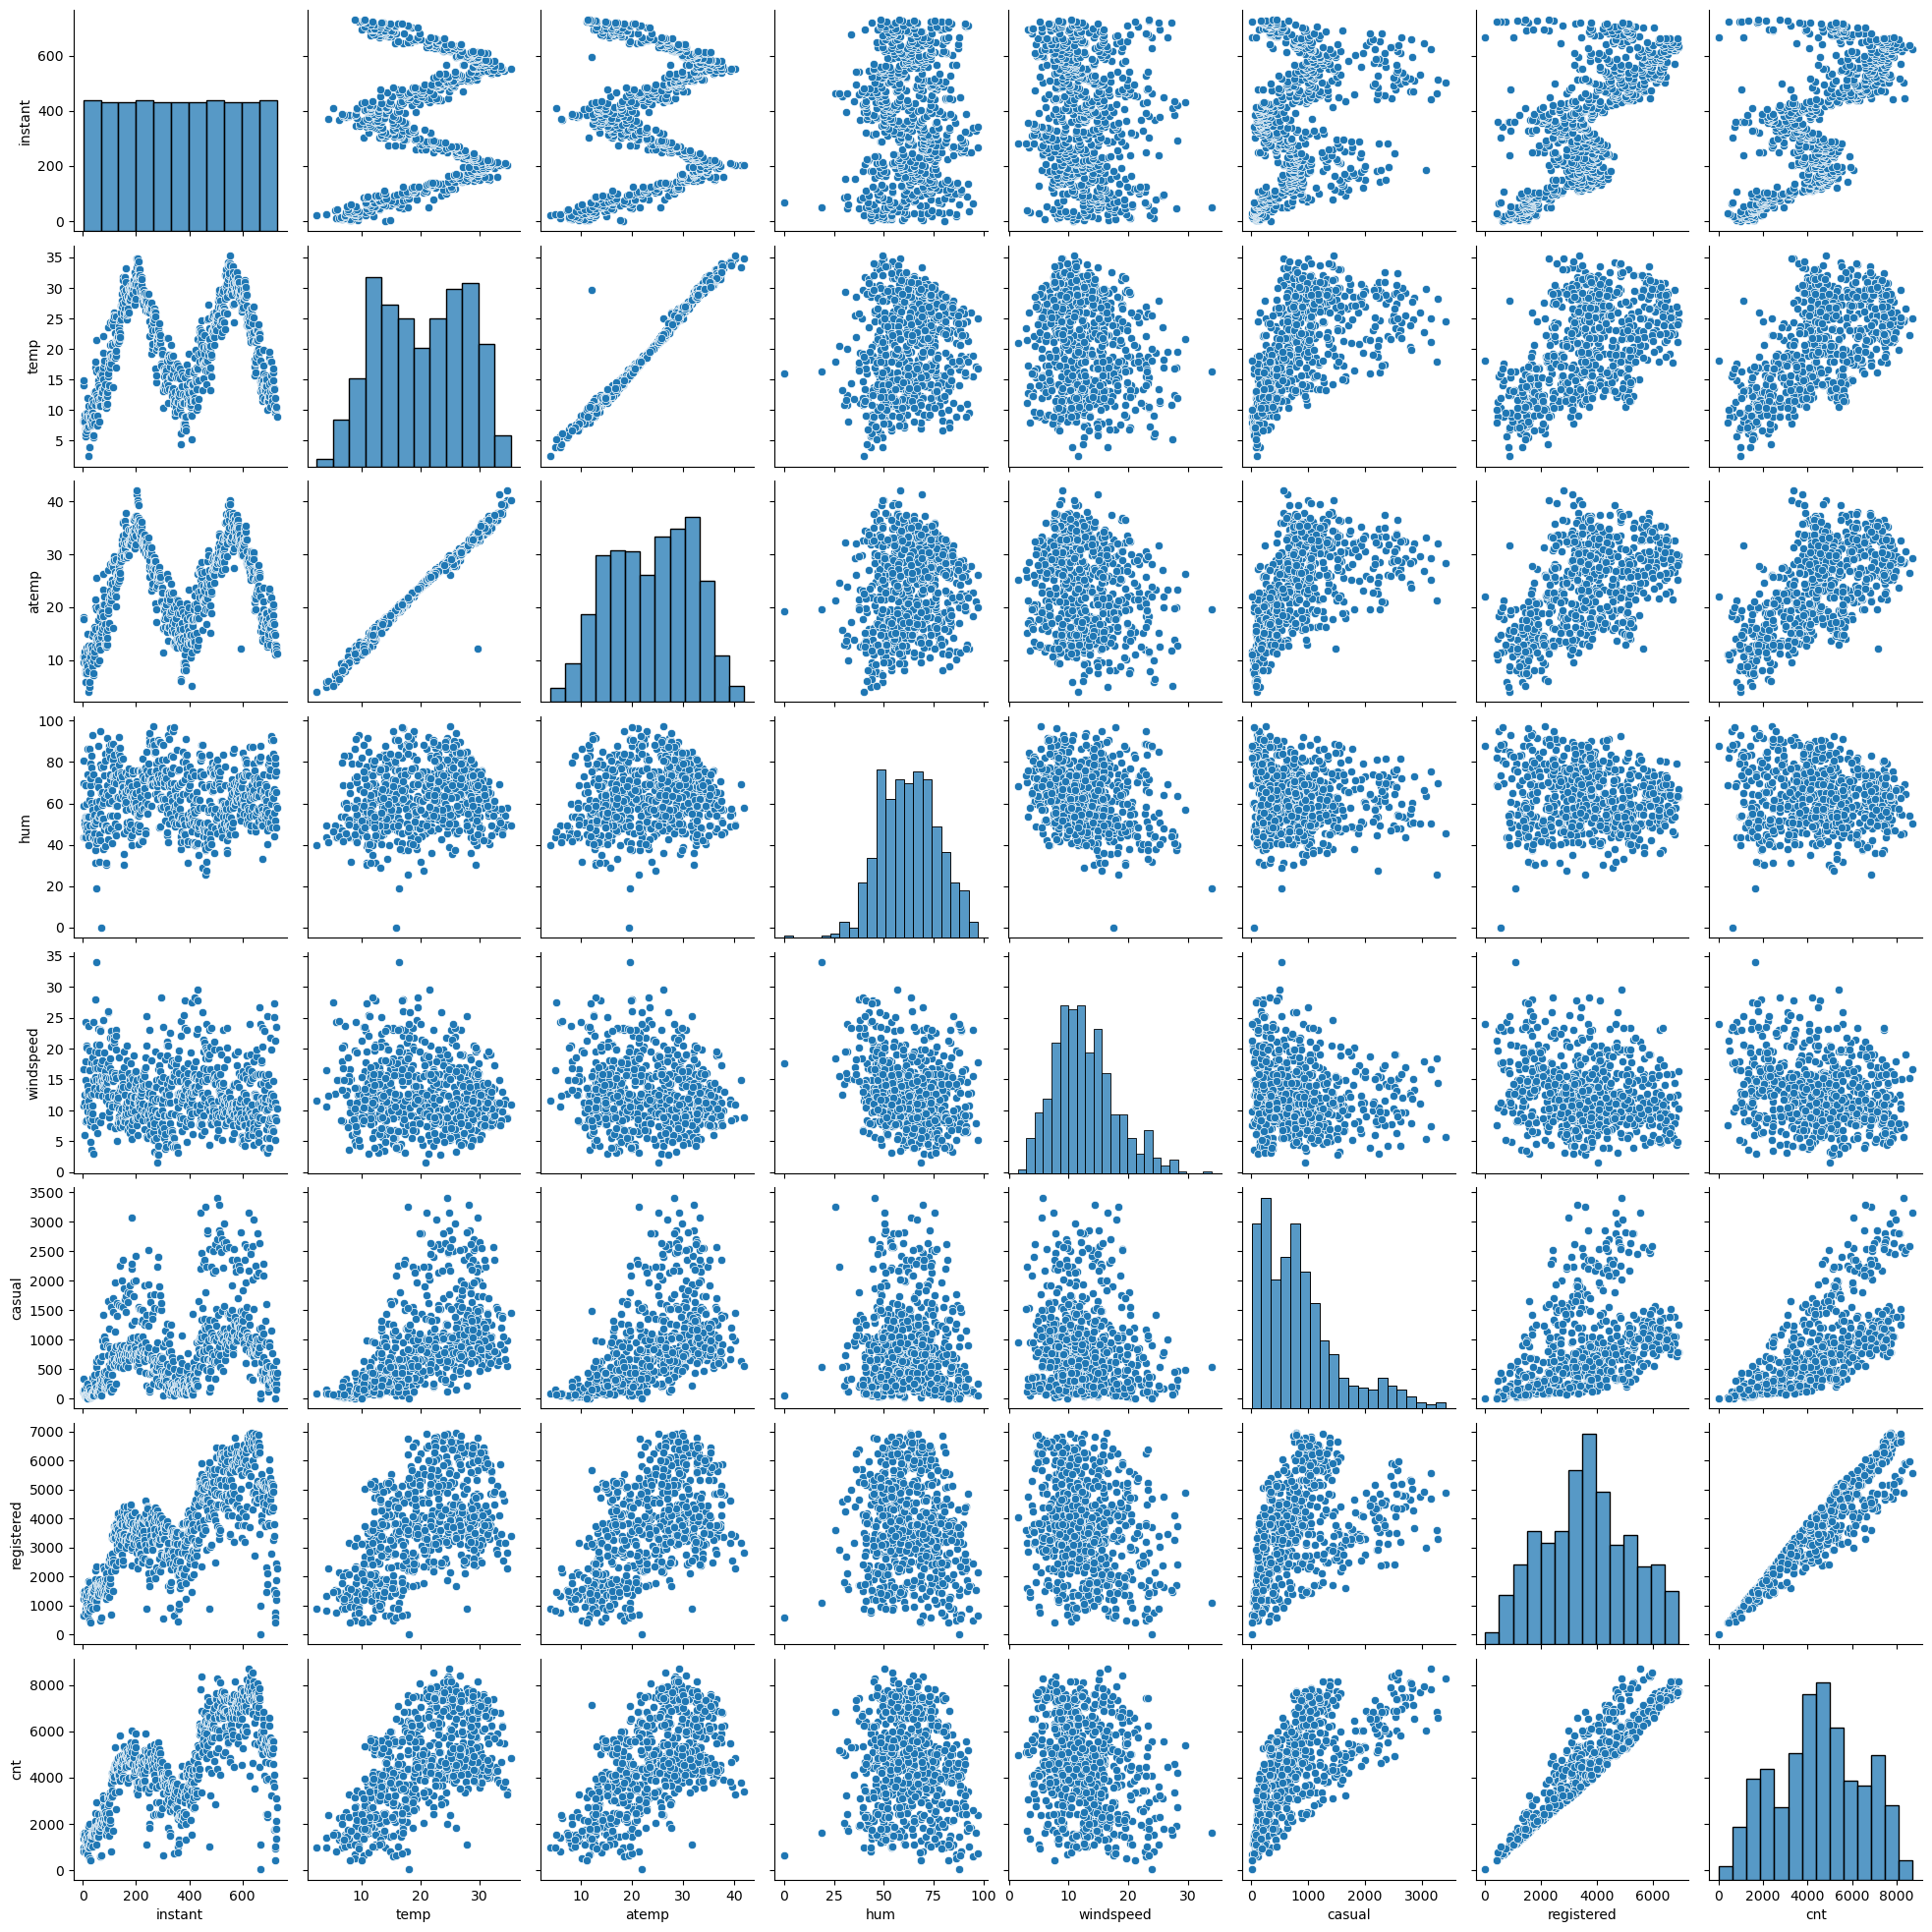

In [198]:
#Visualize the numeric variables of the dataset by using pairplot 
sns.pairplot(df, vars=['instant','temp','atemp','hum','windspeed','casual','registered','cnt'])
plt.show()

In [199]:
#Map the categorical variables with their subcategories to help with visualization analysis 
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


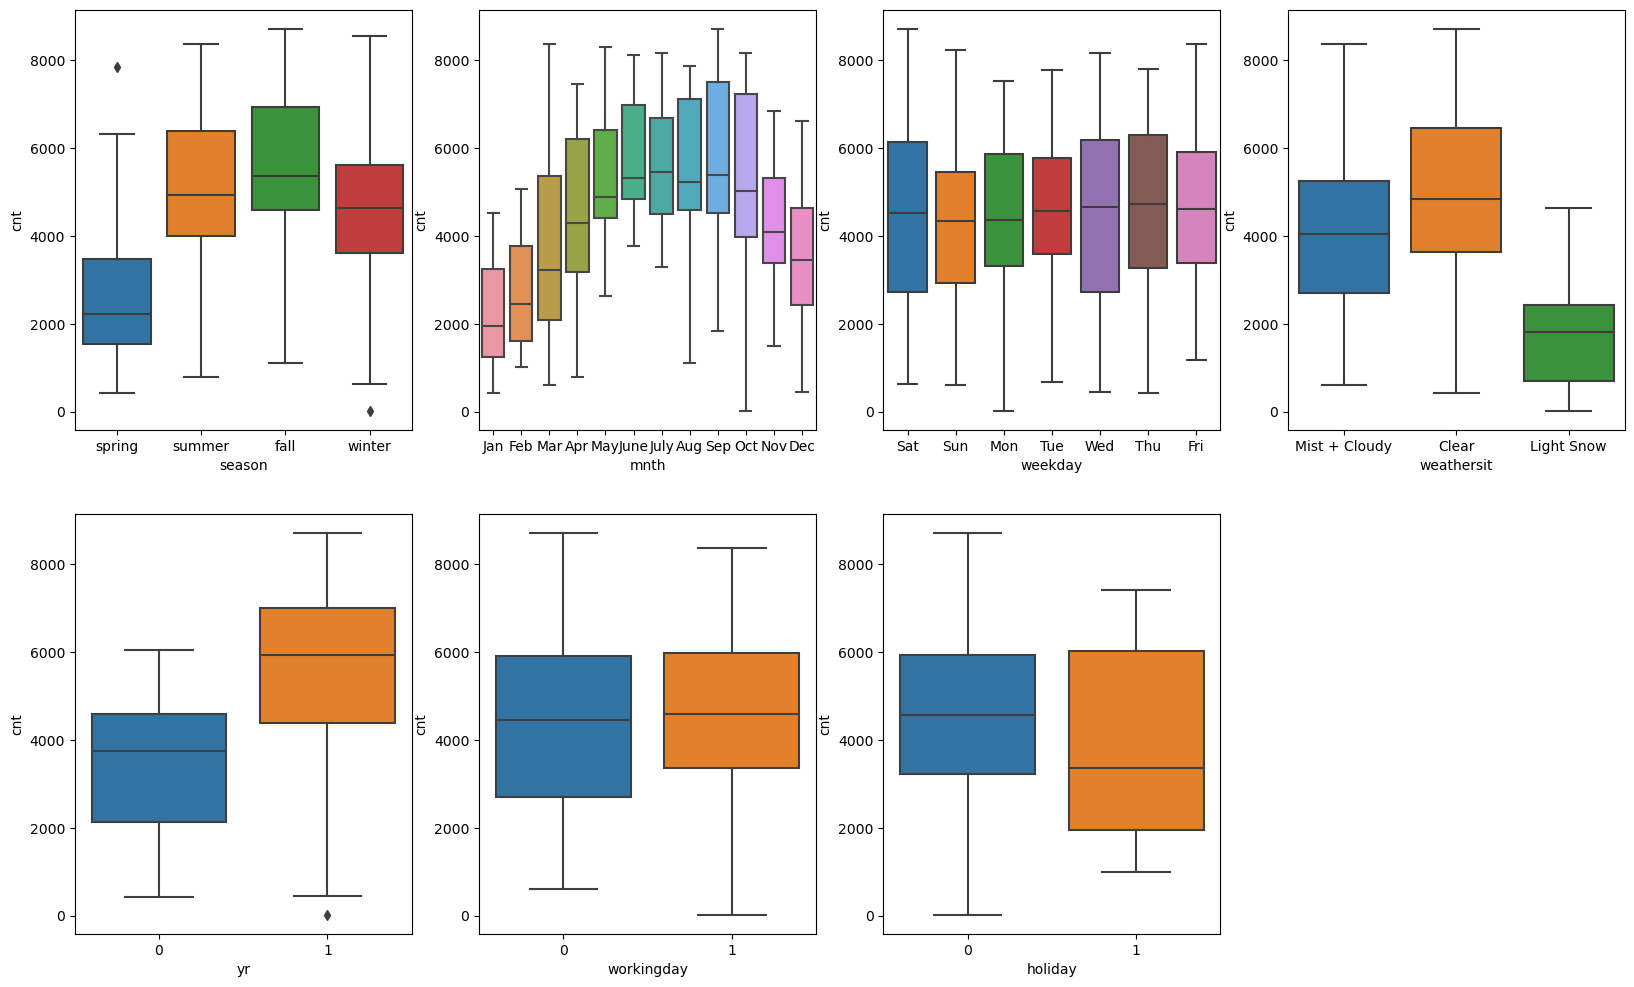

In [200]:
#Visualize the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

### Few observations from the plots above are given below:

1) People were more likely to rent bikes during fall and summer season

2) Most bikes were rented September and October months

3) Thursday, Saturday and Wednesday the days when more bikes were rented

4) Most bike rentals had taken place in the clear weather

5) More bikes were rented in 2019

6) There was no big difference in bike rentals depending on whether it's a working day or not

7) Bike rentals were higher during holidays

In [201]:
# Since both month and Year in two seperate columns, no specific need for date column, thus dropping it
df.drop('dteday', inplace=True, axis = 1)

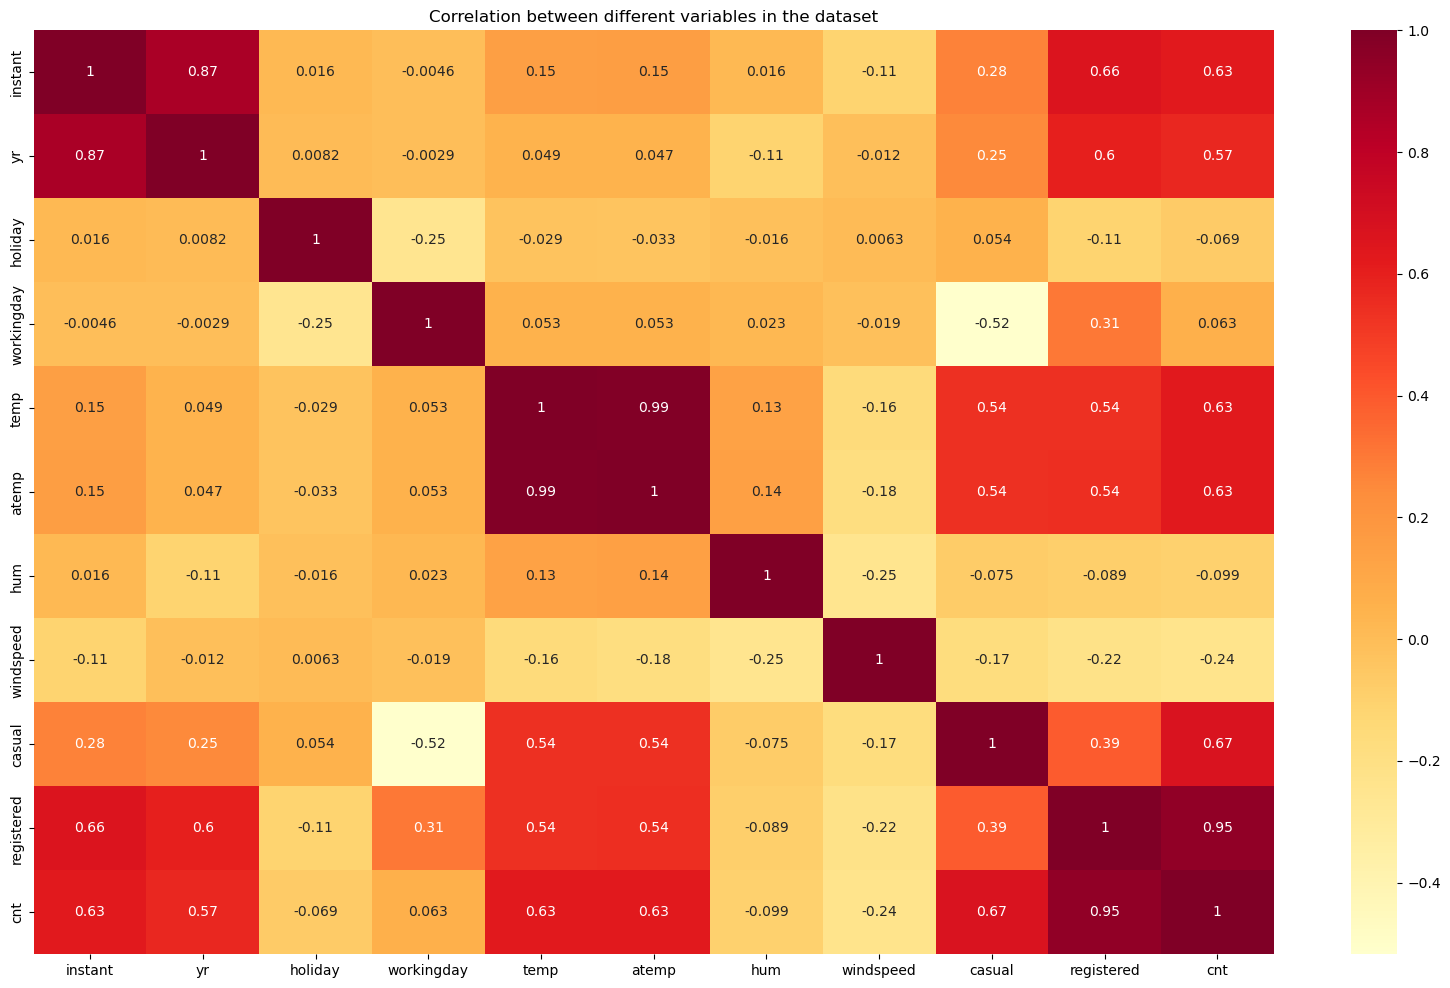

In [203]:
#Make a heatmap to showcase correlation between the variables and decide whether linear regression can be performed on the dataset
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(numeric_only=True), cmap='YlOrRd', annot=True)
plt.title('Correlation between different variables in the dataset')
plt.show()

In [204]:
#Drop the un-required variables from the dataset 
#Drop the variables atemp, instant, dteday, casual, registered as they are not needed for the analysis 
#atemp is not needed as temp is already being used, dteday and casual are also not required for regression analysis 

df = df.drop(['atemp', 'instant', 'casual', 'registered'], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [205]:
#Check the shape of the dataset
df.shape

(730, 11)

In [206]:
#Check the description of the dataset
df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [207]:
#Check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [208]:
#Check the missing values of the dataset
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

In [209]:
#Create dummy variables for the variables of month, weekday, weathersit, seasons
month = pd.get_dummies(df.mnth, drop_first=True, dtype=int)
weekday = pd.get_dummies(df.weekday, drop_first=True, dtype=int)
weathersit = pd.get_dummies(df.weathersit, drop_first=True, dtype=int)
season = pd.get_dummies(df.season, drop_first=True, dtype=int)

In [210]:
#Concatinate the dummy variables to the original dataframe
df = pd.concat([df,month, weekday, weathersit, season], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [211]:
#Drop the variables season, mnth, weekday, weathersit as dummies for them were created
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,0,0,0,6.765000,53.5833,17.875868,959,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8,0,0,0,5.671653,43.4167,24.250650,822,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [212]:
#Check the shape of the dataset and the correlation of variables in a heatmap 
df.shape

(730, 29)

In [213]:
#check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    int32  
 8   Dec            730 non-null    int32  
 9   Feb            730 non-null    int32  
 10  Jan            730 non-null    int32  
 11  July           730 non-null    int32  
 12  June           730 non-null    int32  
 13  Mar            730 non-null    int32  
 14  May            730 non-null    int32  
 15  Nov            730 non-null    int32  
 16  Oct            730 non-null    int32  
 17  Sep            730 non-null    int32  
 18  Mon       

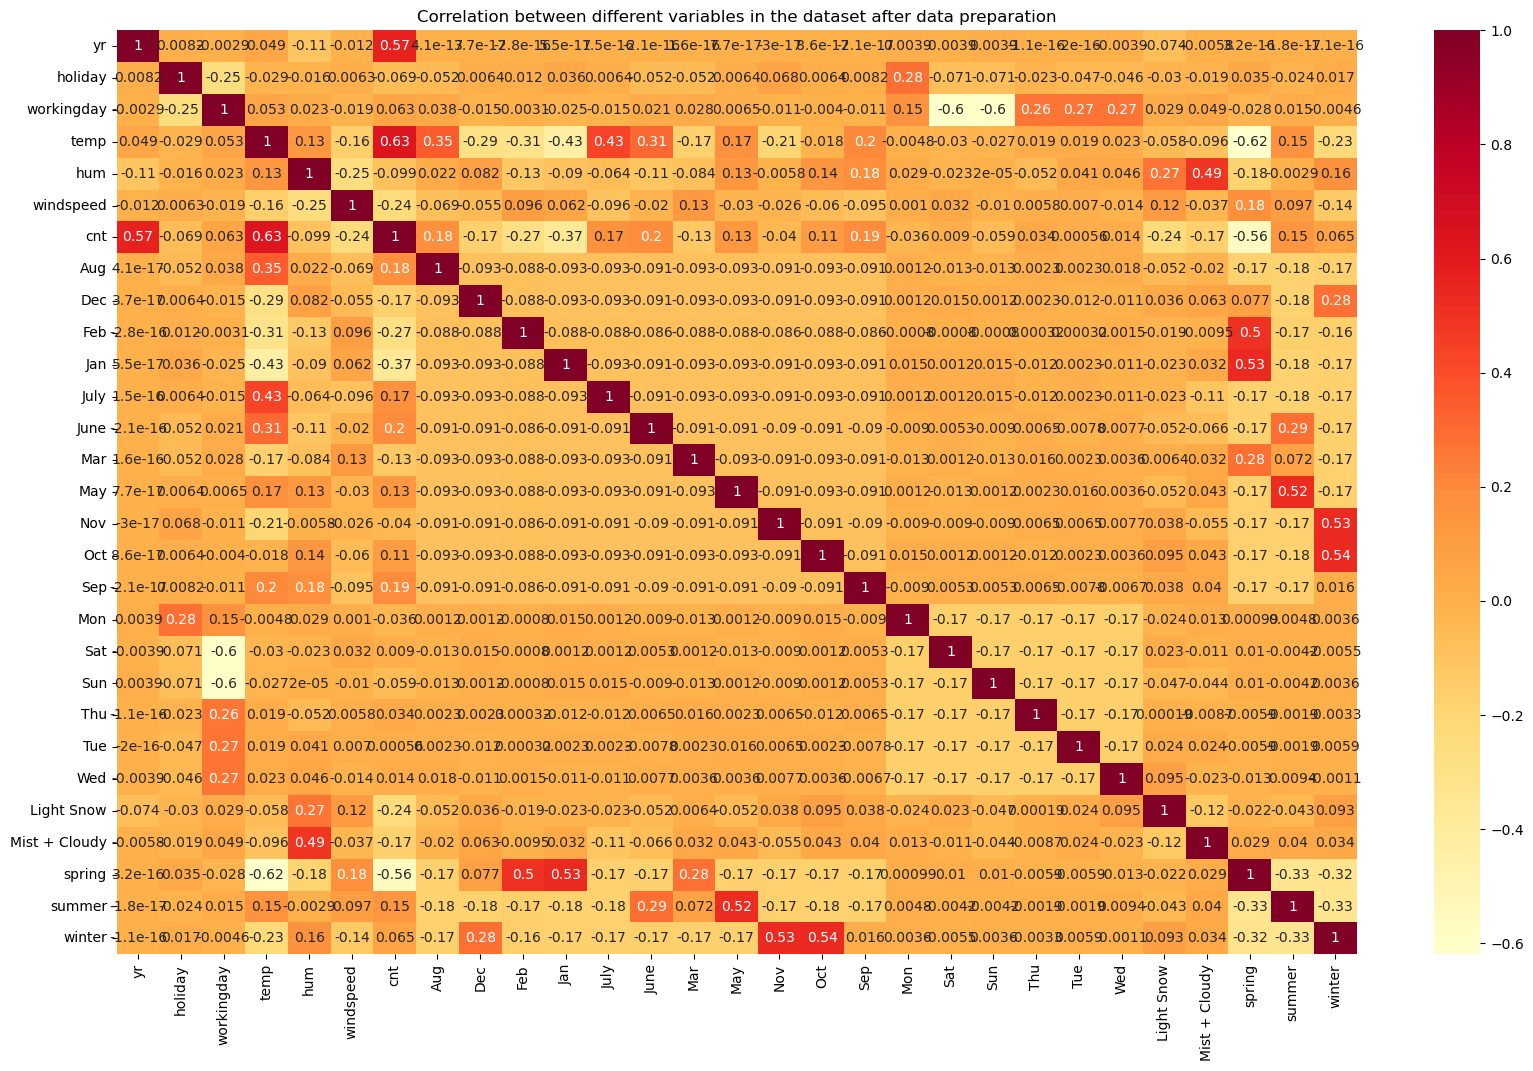

In [214]:
#Make a heatmap to showcase correlation between the new variables 
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='YlOrRd', annot=True)
plt.title('Correlation between different variables in the dataset after data preparation')
plt.show()

### Step 2: Prepare the data for model training (train-test split, rescaling)

In [215]:
#Split the dataset into train and test sets
df_train, df_test = train_test_split(df, train_size=0.8, random_state=100)

In [216]:
#Check the shape of the training dataset
df_train.shape

(584, 29)

In [217]:
#Check the shape of the test dataset
df_test.shape

(146, 29)

### Scaling of variables

In [218]:
#Rescale the variables like hum, temp, windspeed, cnt as they have large values as compared to the other variables of the dataset
#Normalize these values using the scaler.fit_transform() 
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

In [219]:
#Check the normalized values of the train set after performing scaling 
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.649499,0.319463,0.515792,0.090753,0.087329,0.073630,...,0.150685,0.154110,0.135274,0.133562,0.154110,0.027397,0.342466,0.251712,0.246575,0.250000
std,0.500241,0.163378,0.471403,0.225336,0.144219,0.168114,0.225336,0.287504,0.282558,0.261392,...,0.358048,0.361363,0.342309,0.340472,0.361363,0.163378,0.474941,0.434369,0.431387,0.433384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,0.691872,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


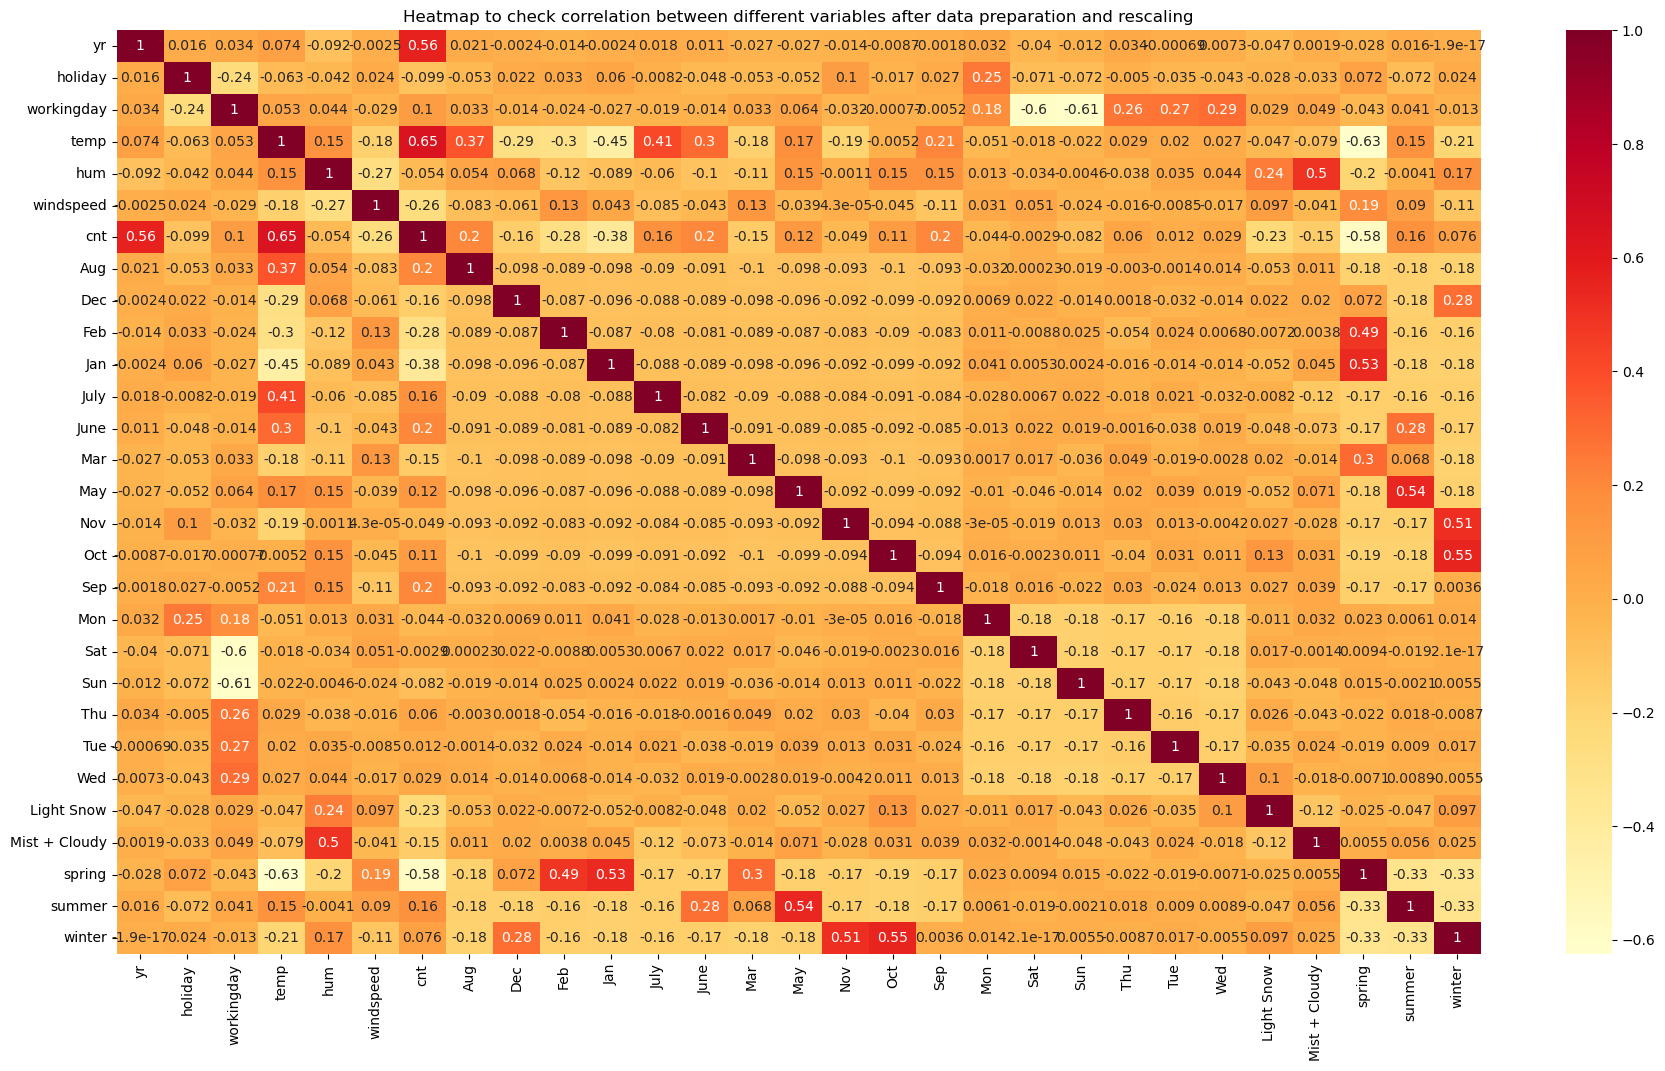

In [220]:
#Check the correlation coefficients to see which variables are highly correlated post data preparation and rescaling
plt.figure(figsize = (22, 12))
sns.heatmap(df_train.corr(), cmap="YlOrRd", annot=True)
plt.title('Heatmap to check correlation between different variables after data preparation and rescaling')
plt.show()

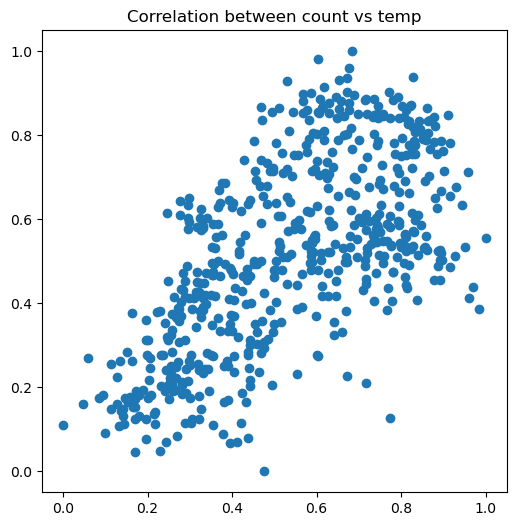

In [221]:
#Check for correlation between count and temp using a pairplot
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

### Step 3: Train the model

In [222]:
#Build our first model using the variable temp
#Prepare the variables for model building 
y_train = df_train.pop('cnt')
X_train = df_train

In [224]:
#Check the variables
y_train.head(5)

367    0.254717
648    0.868385
44     0.217556
705    0.573631
379    0.263346
Name: cnt, dtype: float64

In [225]:
#Check the variables
X_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
367,1,0,1,0.113228,0.454701,0.695175,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
648,1,0,1,0.468352,0.477458,0.299450,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
44,0,0,1,0.443431,0.387290,0.807474,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
705,1,0,1,0.326094,0.787463,0.189819,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
379,1,0,0,0.133996,0.431945,0.449210,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [226]:
#Add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#Create first model
lr = sm.OLS(y_train, X_train_sm)

#Fit
lr_model = lr.fit()

#Params
lr_model.params

const    0.167419
temp     0.648239
dtype: float64

In [227]:
#Check the model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     421.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           6.57e-71
Time:                        18:09:19   Log-Likelihood:                 201.26
No. Observations:                 584   AIC:                            -398.5
Df Residuals:                     582   BIC:                            -389.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1674      0.018      9.104      0.000       0.131       0.204
temp           0.6482      0.032     20.538      0.000       0.586       0.710
==============================================================================
Omnibus:                        9.280   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.317
Skew:                           0.111   Prob(JB):                       0.0425
Kurtosis:                       2.542   Cond. No.                         5.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared = 0.420 which means 42% of the variance in the count quantity is explained by temp

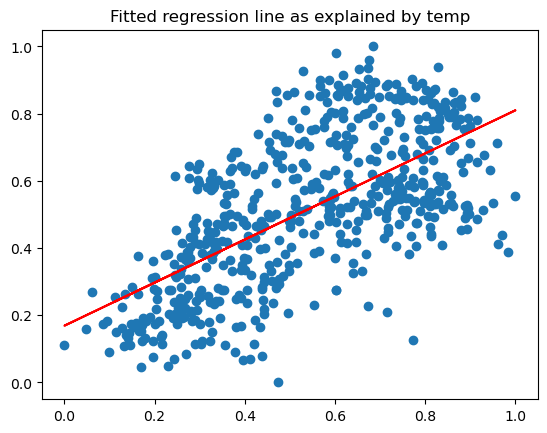

In [228]:
#visualize our data with a scatter plot and the fitted regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line as explained by temp')
plt.show()

In [229]:
#Add another variable thus performing multiple regression 
#Add variable yr and check if it improves the R-squared

X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

#Create second model
lr = sm.OLS(y_train, X_train_sm)

#Fit
lr_model = lr.fit()

#Params
lr_model.params

const    0.068300
temp     0.609811
yr       0.233154
dtype: float64

In [230]:
#Check summary with temp and yr as selected variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     636.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.97e-147
Time:                        18:11:33   Log-Likelihood:                 380.94
No. Observations:                 584   AIC:                            -755.9
Df Residuals:                     581   BIC:                            -742.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0683      0.014      4.794      0.000       0.040       0.096
temp           0.6098      0.023     26.186      0.000       0.564       0.656
yr             0.2332      0.010     22.226      0.000       0.213       0.254
==============================================================================
Omnibus:                       34.672   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.996
Skew:                          -0.515   Prob(JB):                     1.70e-10
Kurtosis:                       3.888   Cond. No.                         6.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is now 0.687 which means 69% of the variance in the count quantity is explained by temperature and year data

In [231]:
#Add all variables and finding out the R-squared values
#Check all the variables in our dataset
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [232]:
#Build a model with all variables
X_train_sm = sm.add_constant(X_train)

#Create third model
lr = sm.OLS(y_train, X_train_sm)

#Fit
lr_model = lr.fit()

#Params
lr_model.params

const            0.241453
yr               0.229189
holiday          0.008135
workingday       0.099964
temp             0.448013
hum             -0.143536
windspeed       -0.181640
Aug              0.016600
Dec             -0.052090
Feb             -0.028861
Jan             -0.059194
July            -0.035010
June             0.009032
Mar              0.002594
May              0.017965
Nov             -0.050449
Oct              0.012846
Sep              0.076986
Mon             -0.024021
Sat              0.096953
Sun              0.036400
Thu             -0.009520
Tue             -0.022671
Wed             -0.007090
Light Snow      -0.263616
Mist + Cloudy   -0.059263
spring          -0.055823
summer           0.042038
winter           0.108931
dtype: float64

In [233]:
#Check summary of model with all the variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.29e-216
Time:                        18:12:29   Log-Likelihood:                 613.13
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2415      0.033      7.329      0.000       0.177       0.306
yr                0.2292      0.007     31.107      0.000       0.215       0.244
holiday           0.0081      0.021      0.379      0.704      -0.034       0.050
workingday        0.1000      0.011      8.833      0.000       0.078       0.122
temp              0.4480      0.042     10.610      0.000       0.365       0.531
hum              -0.1435      0.036     -3.977      0.000      -0.214      -0.073
windspeed        -0.1816      0.024     -7.654      0.000      -0.228      -0.135
Aug               0.0166      0.031      0.539      0.590      -0.044       0.077
Dec              -0.0521      0.031     -1.696      0.090      -0.112       0.008
Feb              -0.0289      0.030     -0.952      0.342      -0.088       0.031
Jan              -0.0592      0.031     -1.893      0.059      -0.121       0.002
July             -0.0350      0.032     -1.095      0.274      -0.098       0.028
June              0.0090      0.022      0.404      0.686      -0.035       0.053
Mar               0.0026      0.023      0.111      0.912      -0.043       0.049
May               0.0180      0.019      0.937      0.349      -0.020       0.056
Nov              -0.0504      0.033     -1.512      0.131      -0.116       0.015
Oct               0.0128      0.032      0.396      0.692      -0.051       0.076
Sep               0.0770      0.029      2.635      0.009       0.020       0.134
Mon              -0.0240      0.014     -1.697      0.090      -0.052       0.004
Sat               0.0970      0.013      7.685      0.000       0.072       0.122
Sun               0.0364      0.013      2.895      0.004       0.012       0.061
Thu              -0.0095      0.014     -0.667      0.505      -0.038       0.019
Tue              -0.0227      0.014     -1.589      0.113      -0.051       0.005
Wed              -0.0071      0.014     -0.511      0.610      -0.034       0.020
Light Snow       -0.2636      0.025    -10.548      0.000      -0.313      -0.215
Mist + Cloudy    -0.0593      0.010     -6.144      0.000      -0.078      -0.040
spring           -0.0558      0.027     -2.051      0.041      -0.109      -0.002
summer            0.0420      0.024      1.750      0.081      -0.005       0.089
winter            0.1089      0.025      4.420      0.000       0.061       0.157
==============================================================================
Omnibus:                      105.593   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.625
Skew:                          -0.880   Prob(JB):                     5.25e-66
Kurtosis:                       6.043   Cond. No.                     9.16e+15
================================================================

R-squared is now .859 which means 86% of the variance in the count quantity is explained with all the variables

### Using RFE:
We have found out the R-squared values and the best fit lines using the manual approach for feature selection. We will now using the automated approach for selecting the values required for building the most optimized models and dropping the values which are redundant for our model building approach. We will now use RFE for automated approach, along with VIF to determine the variables to drop.

In [234]:
#Check the number of columns in our dataset
len(df.columns)

29

In [235]:
#Creat the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

#Set feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#Fit rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

In [236]:
#Check the elements selected and the ones rejected in a list after rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', False, 2),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 13),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1)]

In [237]:
#Get the selected feature variables in one variable
true_rfe = X_train.columns[rfe.support_]

In [238]:
#Check the values of true_rfe
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan',
       'July', 'Nov', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring',
       'winter'],
      dtype='object')

In [239]:
#Check the length of true_rfe
len(true_rfe)

15

In [249]:
#Build model using selected RFE variables
#Create training set with RFE selected variables
X_train_rfe = X_train[true_rfe]

In [250]:
#Add constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe)

#Fit
lr_model = lr.fit()

#Params
lr_model.params

const            0.315545
yr               0.228912
holiday         -0.043593
workingday       0.050966
temp             0.445792
hum             -0.129521
windspeed       -0.183773
Dec             -0.060401
Jan             -0.049962
July            -0.078662
Nov             -0.068834
Sat              0.061303
Light Snow      -0.263444
Mist + Cloudy   -0.059698
spring          -0.110529
winter           0.081689
dtype: float64

In [251]:
#Check the summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.02e-223
Time:                        18:25:08   Log-Likelihood:                 598.33
No. Observations:                 584   AIC:                            -1165.
Df Residuals:                     568   BIC:                            -1095.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3155      0.031     10.212      0.000       0.255       0.376
yr                0.2289      0.007     30.876      0.000       0.214       0.243
holiday          -0.0436      0.024     -1.806      0.071      -0.091       0.004
workingday        0.0510      0.010      4.920      0.000       0.031       0.071
temp              0.4458      0.031     14.594      0.000       0.386       0.506
hum              -0.1295      0.035     -3.671      0.000      -0.199      -0.060
windspeed        -0.1838      0.024     -7.763      0.000      -0.230      -0.137
Dec              -0.0604      0.015     -3.937      0.000      -0.091      -0.030
Jan              -0.0500      0.016     -3.056      0.002      -0.082      -0.018
July             -0.0787      0.016     -5.030      0.000      -0.109      -0.048
Nov              -0.0688      0.017     -4.041      0.000      -0.102      -0.035
Sat               0.0613      0.013      4.618      0.000       0.035       0.087
Light Snow       -0.2634      0.025    -10.534      0.000      -0.313      -0.214
Mist + Cloudy    -0.0597      0.010     -6.135      0.000      -0.079      -0.041
spring           -0.1105      0.014     -7.800      0.000      -0.138      -0.083
winter            0.0817      0.012      6.557      0.000       0.057       0.106
==============================================================================
Omnibus:                       96.561   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.184
Skew:                          -0.797   Prob(JB):                     3.22e-62
Kurtosis:                       6.017   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
#Check the VIF of the model 
#Drop the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [258]:
#Calculate the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,25.87
3,temp,18.12
2,workingday,5.01
5,windspeed,4.25
13,spring,3.06
14,winter,2.77
12,Mist + Cloudy,2.29
0,yr,2.08
10,Sat,1.90
7,Jan,1.71


### How to check the conditions for variables elimination:
Some of the potential conditions which can be helpful while deciding which variables to check. These conditions are formulated after studying the VIF, p-values and going through the course content.

1) High p-value, high VIF : definitely drop

2) High-Low:
    * High p, low VIF : remove these first, then build model again and check VIF again
    * Low p, high VIF : remove these later

3) Low p-value, low VIF : keep variable

In [259]:
#Hum variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['hum'], axis = 1)

In [260]:
#Add constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#Create first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#Fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     226.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.00e-221
Time:                        18:27:12   Log-Likelihood:                 591.49
No. Observations:                 584   AIC:                            -1153.
Df Residuals:                     569   BIC:                            -1087.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2460      0.025      9.971      0.000       0.198       0.294
yr                0.2327      0.007     31.347      0.000       0.218       0.247
holiday          -0.0418      0.024     -1.715      0.087      -0.090       0.006
workingday        0.0527      0.010      5.042      0.000       0.032       0.073
temp              0.4178      0.030     13.973      0.000       0.359       0.477
windspeed        -0.1600      0.023     -6.952      0.000      -0.205      -0.115
Dec              -0.0660      0.015     -4.278      0.000      -0.096      -0.036
Jan              -0.0544      0.016     -3.299      0.001      -0.087      -0.022
July             -0.0715      0.016     -4.561      0.000      -0.102      -0.041
Nov              -0.0690      0.017     -4.006      0.000      -0.103      -0.035
Sat               0.0642      0.013      4.793      0.000       0.038       0.091
Light Snow       -0.3006      0.023    -13.004      0.000      -0.346      -0.255
Mist + Cloudy    -0.0807      0.008    -10.160      0.000      -0.096      -0.065
spring           -0.1124      0.014     -7.854      0.000      -0.141      -0.084
winter            0.0751      0.012      6.027      0.000       0.051       0.100
==============================================================================
Omnibus:                       99.012   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.247
Skew:                          -0.808   Prob(JB):                     1.72e-65
Kurtosis:                       6.106   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
#Check the VIF of the model 
#Drop the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [262]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,temp,6.55
2,workingday,4.89
4,windspeed,4.25
12,spring,2.48
13,winter,2.40
0,yr,2.07
9,Sat,1.88
8,Nov,1.68
6,Jan,1.63
11,Mist + Cloudy,1.55


In [109]:
#Sat variable can be dropped due to low VIF and high p-value
X_train_new_2 = X_train_lr1.drop(['Sat'], axis = 1)

In [263]:
#Add constant to training variable
X_train_lr2 = sm.add_constant(X_train_new_2)

#Create first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr2)

#Fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     236.9
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          6.74e-220
Time:                        18:29:48   Log-Likelihood:                 584.31
No. Observations:                 584   AIC:                            -1141.
Df Residuals:                     570   BIC:                            -1079.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3604      0.030     11.872      0.000       0.301       0.420
yr                0.2286      0.008     30.189      0.000       0.214       0.244
holiday          -0.0875      0.023     -3.784      0.000      -0.133      -0.042
temp              0.4535      0.031     14.537      0.000       0.392       0.515
hum              -0.1402      0.036     -3.895      0.000      -0.211      -0.070
windspeed        -0.1814      0.024     -7.498      0.000      -0.229      -0.134
Dec              -0.0575      0.016     -3.666      0.000      -0.088      -0.027
Jan              -0.0479      0.017     -2.866      0.004      -0.081      -0.015
July             -0.0816      0.016     -5.107      0.000      -0.113      -0.050
Nov              -0.0692      0.017     -3.974      0.000      -0.103      -0.035
Light Snow       -0.2542      0.026     -9.965      0.000      -0.304      -0.204
Mist + Cloudy    -0.0557      0.010     -5.618      0.000      -0.075      -0.036
spring           -0.1107      0.014     -7.642      0.000      -0.139      -0.082
winter            0.0819      0.013      6.433      0.000       0.057       0.107
==============================================================================
Omnibus:                       88.557   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.465
Skew:                          -0.755   Prob(JB):                     3.69e-53
Kurtosis:                       5.765   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [264]:
#Checking the VIF of the model 
#Drop the constant variables from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

In [112]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,25.25
2,temp,17.23
4,windspeed,4.11
11,spring,3.00
12,winter,2.76
10,Mist + Cloudy,2.29
0,yr,2.07
8,Nov,1.71
6,Jan,1.70
5,Dec,1.51


In [265]:
#Hum variable can be dropped due to a high VIF
X_train_new_3 = X_train_lr2.drop(['hum'], axis = 1)

In [267]:
#Add constant to training variable
X_train_lr3 = sm.add_constant(X_train_new_3)

#Create first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr3)

#Fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          7.25e-218
Time:                        18:31:10   Log-Likelihood:                 576.64
No. Observations:                 584   AIC:                            -1127.
Df Residuals:                     571   BIC:                            -1070.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2867      0.024     11.934      0.000       0.239       0.334
yr                0.2327      0.008     30.641      0.000       0.218       0.248
holiday          -0.0874      0.023     -3.733      0.000      -0.133      -0.041
temp              0.4234      0.031     13.838      0.000       0.363       0.483
windspeed        -0.1554      0.024     -6.602      0.000      -0.202      -0.109
Dec              -0.0634      0.016     -4.017      0.000      -0.094      -0.032
Jan              -0.0526      0.017     -3.117      0.002      -0.086      -0.019
July             -0.0739      0.016     -4.607      0.000      -0.105      -0.042
Nov              -0.0694      0.018     -3.936      0.000      -0.104      -0.035
Light Snow       -0.2942      0.024    -12.447      0.000      -0.341      -0.248
Mist + Cloudy    -0.0784      0.008     -9.655      0.000      -0.094      -0.062
spring           -0.1128      0.015     -7.697      0.000      -0.142      -0.084
winter            0.0748      0.013      5.862      0.000       0.050       0.100
==============================================================================
Omnibus:                       89.913   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.053
Skew:                          -0.761   Prob(JB):                     8.30e-55
Kurtosis:                       5.814   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [268]:
#Check the VIF of the model 
#Drop the constant variables from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

In [269]:
#Calculate the VIF of the model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.35
3,windspeed,4.10
10,spring,2.35
11,winter,2.35
0,yr,2.07
7,Nov,1.67
5,Jan,1.61
9,Mist + Cloudy,1.52
4,Dec,1.41
6,July,1.32


In [270]:
#Windspeed variable can be dropped due to negative correlation with cnt
X_train_new_4 = X_train_lr3.drop(['windspeed'], axis = 1)

In [271]:
#Add constant to training variable
X_train_lr4 = sm.add_constant(X_train_new_4)

#Create first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr4)

#Fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     249.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          5.50e-210
Time:                        18:32:26   Log-Likelihood:                 555.16
No. Observations:                 584   AIC:                            -1086.
Df Residuals:                     572   BIC:                            -1034.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2174      0.022      9.706      0.000       0.173       0.261
yr                0.2315      0.008     29.419      0.000       0.216       0.247
holiday          -0.0902      0.024     -3.720      0.000      -0.138      -0.043
temp              0.4537      0.031     14.470      0.000       0.392       0.515
Dec              -0.0533      0.016     -3.273      0.001      -0.085      -0.021
Jan              -0.0399      0.017     -2.298      0.022      -0.074      -0.006
July             -0.0719      0.017     -4.325      0.000      -0.105      -0.039
Nov              -0.0705      0.018     -3.861      0.000      -0.106      -0.035
Light Snow       -0.3092      0.024    -12.676      0.000      -0.357      -0.261
Mist + Cloudy    -0.0762      0.008     -9.060      0.000      -0.093      -0.060
spring           -0.1160      0.015     -7.642      0.000      -0.146      -0.086
winter            0.0845      0.013      6.432      0.000       0.059       0.110
==============================================================================
Omnibus:                       94.530   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.610
Skew:                          -0.783   Prob(JB):                     2.34e-60
Kurtosis:                       5.972   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
#Check the VIF of the model 
#Drop the constant variables from the dataset
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)

In [273]:
#Calculate the VIF of the model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.74
10,winter,2.34
0,yr,2.06
9,spring,1.92
6,Nov,1.65
4,Jan,1.61
8,Mist + Cloudy,1.52
3,Dec,1.41
5,July,1.30
1,holiday,1.05


In [274]:
#July is dropped because of low VIF and the p-value
X_train_new_5 = X_train_lr4.drop(['July'], axis = 1)

In [276]:
#Add constant to training variable
X_train_lr5 = sm.add_constant(X_train_new_5)

#Create first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr5)

#Fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     264.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.18e-207
Time:                        18:33:44   Log-Likelihood:                 545.77
No. Observations:                 584   AIC:                            -1070.
Df Residuals:                     573   BIC:                            -1021.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2384      0.022     10.737      0.000       0.195       0.282
yr                0.2322      0.008     29.064      0.000       0.216       0.248
holiday          -0.0902      0.025     -3.664      0.000      -0.139      -0.042
temp              0.4063      0.030     13.622      0.000       0.348       0.465
Dec              -0.0603      0.016     -3.663      0.000      -0.093      -0.028
Jan              -0.0477      0.018     -2.715      0.007      -0.082      -0.013
Nov              -0.0771      0.018     -4.169      0.000      -0.113      -0.041
Light Snow       -0.3113      0.025    -12.572      0.000      -0.360      -0.263
Mist + Cloudy    -0.0730      0.009     -8.578      0.000      -0.090      -0.056
spring           -0.1209      0.015     -7.865      0.000      -0.151      -0.091
winter            0.0874      0.013      6.562      0.000       0.061       0.114
==============================================================================
Omnibus:                      100.350   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.489
Skew:                          -0.831   Prob(JB):                     5.06e-64
Kurtosis:                       6.036   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [277]:
#Check the VIF of the model 
#Drop the constant variables from the dataset
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)

In [279]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,winter,2.28
2,temp,2.25
0,yr,2.06
8,spring,1.89
5,Nov,1.65
4,Jan,1.61
7,Mist + Cloudy,1.49
3,Dec,1.41
1,holiday,1.05
6,Light Snow,1.05


### Step 4: Residual analysis

In [280]:
#Add constant to training variable
X_train_lr5 = sm.add_constant(X_train_lr5)

X_train_lr5

,const,yr,holiday,temp,Dec,Jan,Nov,Light Snow,Mist + Cloudy,spring,winter
367,1.0,1,0,0.113228,0,1,0,0,0,1,0
648,1.0,1,0,0.468352,0,0,0,0,0,0,1
44,1.0,0,0,0.443431,0,0,0,0,0,1,0
705,1.0,1,0,0.326094,1,0,0,0,1,0,1
379,1.0,1,0,0.133996,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0,0,0,0,0,1,0
350,1.0,0,0,0.248216,1,0,0,0,1,0,1
79,1.0,0,0,0.462664,0,0,0,0,1,0,0


In [281]:
#Get the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr5)

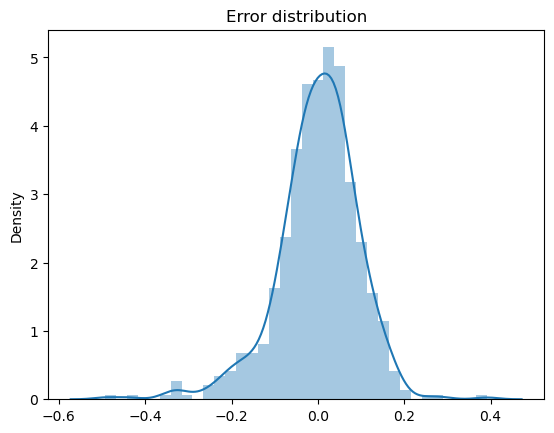

In [282]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()

### Make Predictions on the testing set

In [284]:
#Perform standardization (MinMax scaling) on test set
#Check the variables to be standardized
scaler_var

['hum', 'windspeed', 'temp', 'cnt']

In [285]:
#Perform scaling on test data set
#Train dataset is to be fit, test dataset is not fit but simply transformed
#Test dataset is transformed based on fit of train dataset
df_test[scaler_var] = scaler.transform(df_test[scaler_var])

In [286]:
#Check the description on the test
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.746575,0.569603,0.635933,0.315127,0.517368,0.061644,0.075342,0.089041,...,0.116438,0.102740,0.171233,0.178082,0.089041,0.034247,0.315068,0.226027,0.273973,0.219178
std,0.498699,0.182488,0.436469,0.238088,0.156357,0.161524,0.212757,0.241335,0.264852,0.285783,...,0.321854,0.304664,0.378009,0.383899,0.285783,0.182488,0.466142,0.419697,0.447530,0.415114
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.055683,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.359075,0.534457,0.196160,0.391251,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.614856,0.306383,0.508916,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.730570,0.411976,0.649994,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.800793,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [287]:
#Build test model using the variable temp
#Prepare the variables for model building 

y_test = df_test.pop('cnt')
X_test = df_test

In [288]:
#Check the values
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [289]:
#Check the values
X_test.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [290]:
#Print feature variables

X_train_lr5.columns

Index(['const', 'yr', 'holiday', 'temp', 'Dec', 'Jan', 'Nov', 'Light Snow',
       'Mist + Cloudy', 'spring', 'winter'],
      dtype='object')

In [291]:
#Drop constant
X_train_lr5.drop(columns= 'const', inplace = True)

In [292]:
#Create new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr5.columns]

#Add a constant variable
X_test_new = sm.add_constant(X_test_new)

In [293]:
#Make predictions
y_pred = lr_model.predict(X_test_new)

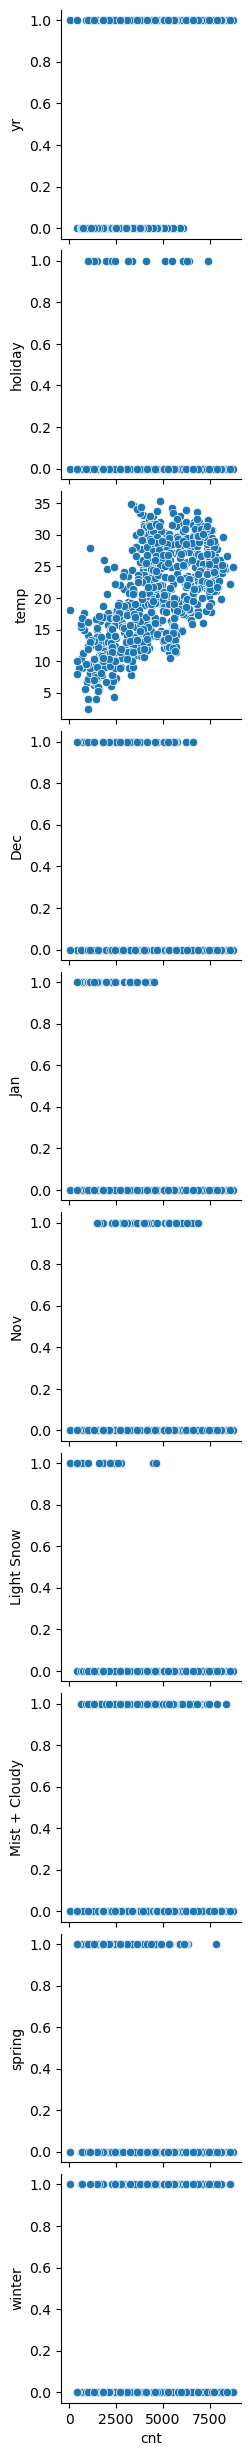

<Figure size 1600x1200 with 0 Axes>

In [140]:
#build a scatter plot to observe relationship between the dependent and the feature variables

sns.pairplot(df, y_vars=X_train_lr5.columns, x_vars='cnt')
plt.figure(figsize = (16, 12))
plt.show()

### Step 5: Prediction and evaluation of the test set

In [295]:
#Find the r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('R2 score on the test set is', r2_test)

R2 score on the test set is 0.7947252718567879


In [296]:
#Find the r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('R2 score on the train set is', r2_train)

R2 score on the train set is 0.821809863625373


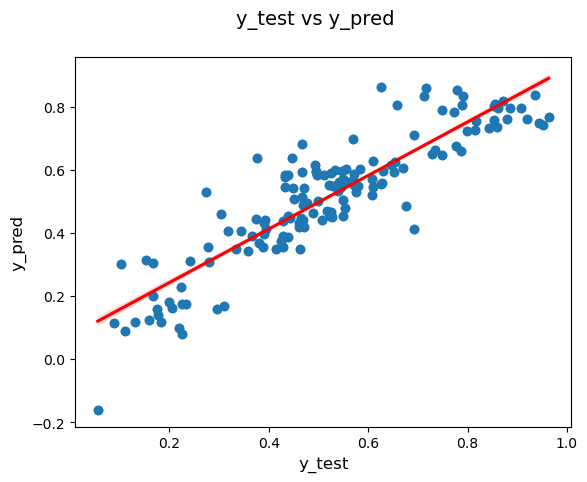

In [297]:
# Understand the spread by plotting y_test and y_pred

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 14)               
plt.xlabel('y_test', fontsize = 12)                          
plt.ylabel('y_pred', fontsize = 12) 
plt.show()

### Equation of the best fitted line is:

cnt = 0.2384×const + 0.2322×yr - 0.0902×holiday + 0.4063×temp - 0.0603×Dec - 0.0477×Jan - 0.0771×Nov - 0.3113×Light Snow - 0.0730(Mist + Cloudy) - 0.1209×spring + 0.0874×winter 

In [298]:
#Find the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.00903231942152196
Mean squared error of the test set is 0.00922822305940821


# Summary:

### The summary of the model prepared after peforming data interpretation, visualisation, data-preparation, model building, training, residual analysis and evaluation is given below:

 1) The model which is biult has R-squared value of the train set is 82.18% and test set has a value of 79.47%, which suggests that  model broadly explains the variance accurate and we can conclude that it is a good model.
 
 2) Mean squared error is almost 0 on both the training and testing datasets for the developed model which suggests that the variance prediction is accurate on the test set. Significant variables are identified by using p-values and VIF and RFE was also performed for selecting variables automatically.

 3) Based on the model developed we can conclude that the bike demands of BoomBikes company is dependent on the temperature, day of the week, season and weather type. Demand is low on non-working days,during summer and when weather is not clear like snowy, misty or cloudy.

 4) The above interpretations help us derive meaningful insights in the bike rental market. We can conclude and recommend the biker rental comanies to do aggressive marketing with good incentive or strategy deals during Summer or when the weather is not clear. They can look into a better approach to introduce more users on days when the weather is less clear. Rentals were more in 2019 than 2018 suggests that over time people are exposed to this idea and are willing to try the bike renting options, so company can look for better marketing and make use customers can look forward to rent the bikes again and become repeat customers.